In [13]:
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn
import sklearn.model_selection
import sklearn.neighbors
import sklearn.ensemble
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
%matplotlib inline

# Бронирование отлей. Анализ данных.

![Image of Yaktocat](https://hotels.sletat.ru/i/f/2033_2.jpg)

## Описание задачи.

Этот набор данных содержит 119390 наблюдений для City Hotel и Resort Hotel. Каждое наблюдение представляет собой бронирование отеля в период с 1 июля 2015 года по 31 августа 2017 года. Здесь содержится вся информация о бронировании: сколько бронирований было отменено, сколько взрослых прибудет в отель, сколько детей, время пребывания, продолжительность проживания и другие признаки. Благодаря этим данным мы сможем проанализировать, найти недостатки, улучшить работу данных отелей, предсказывать отмену брониования и пытаться исправить это.

## Чтение данных.

Загрузим датасет, с которым будем работать.

In [12]:
url = "https://raw.githubusercontent.com/KorobkovaKV/Machine_Learning/main/hotel_booking.csv"
data = pd.read_csv(url)

In [13]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [14]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

Признаки: hotel - отель(Resort Hotel или City Hotel); is_canceled - отмена бронирования; lead_time - время, прошедшее с момента бронирования до прибытия в отель; arrival_date_year - год прибытия; arrival_date_month - месяц прибытия; arrival_date_week_number - номер недели прибытия; arrival_date_day_of_month - день прибытия; stays_in_weekend_nights - число ночей, проведенных в выходные в отеле; stays_in_week_nights - число ночей, проведенных в будни в отеле; adults - число взрослых; children - число детей; babies - число младенцев; meal - вид питания (SC - без питания; BB - завтрак; HB - завтрак, ужин; FB - завтрак, обед, ужин); country - страна; market_segment - сегмент рынка (ТА - куплена через туристическое агенство; ТО - через туроператора); distribution_channel - канал распространения бронирования; is_repeated_guest - повторно ли прибывает гость (1) или нет (0); previous_cancellations - число предыдущих отмен бронирования; previous_bookings_not_canceled - число предыдущих не отмененных бронирований; reserved_room_type - тип забронированного номера; assigned_room_type - тип назначенного номера (иногда тип забранированного номера может отличаться от назначенного); booking_changes - число изменений или дополнений, внесенных в бронирование с момента первого броирования; deposit_type - тип депозита (No Deposit - без депозита, Non Refund - внесена полная стоимость проживания, Refundable - внесено меньше стоимости проживания); agent - ID туристического агентства, сделавшего бронирование; company - ID компании или юридического лица, совершившего бронирование или ответственного за его оплату; days_in_waiting_list - число дней, в течение которых бронирование находилось в листе ожидания, прежде чем оно было подтверждено клиенту; customer_type - тип клиента (группа - когда бронирование связано с группой; временный - когда бронирование не является частью группы или контракта); adr - средняя дневная ставка (рассчитывается путем деления суммы всех транзакций по размещению на общее количество ночей проживания); required_car_parking_spaces - число требуемых мест парковки; total_of_special_requests - число особых запросов, сделанных клиентом; reservation_status - статус последнего бронирования (Canceled - бронирование было отменено клиентом, Check-Out - зарегистрировался, но уже уехал; No-Show - не заселился и не проинформировал отель о причине); reservation_status_date - дата установления последнего статуса; name - имя; email - электронная почта; phone-number - номер телефона; credit_card - номер кредитной карты;

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Для сохранения анонимности удалим столбцы с личной информацией клиентов: name, email, phone-number, credit_card, reservation_status_date.

In [16]:
data = data.drop(columns=['name', 'email', 'phone-number', 'credit_card', 'reservation_status_date'])

In [17]:
data.shape

(119390, 31)

In [18]:
data['hotel'] = data['hotel'].astype('category');
data['arrival_date_month'] = data['arrival_date_month'].astype('category');
data['meal'] = data['meal'].astype('category');
data['country'] = data['country'].astype('category');
data['market_segment'] = data['market_segment'].astype('category');
data['distribution_channel'] = data['distribution_channel'].astype('category');
data['reserved_room_type'] = data['reserved_room_type'].astype('category');
data['assigned_room_type'] = data['assigned_room_type'].astype('category');
data['deposit_type'] = data['deposit_type'].astype('category');
data['customer_type'] = data['customer_type'].astype('category');
data['reservation_status'] = data['reservation_status'].astype('category');
data.dtypes

hotel                             category
is_canceled                          int64
lead_time                            int64
arrival_date_year                    int64
arrival_date_month                category
arrival_date_week_number             int64
arrival_date_day_of_month            int64
stays_in_weekend_nights              int64
stays_in_week_nights                 int64
adults                               int64
children                           float64
babies                               int64
meal                              category
country                           category
market_segment                    category
distribution_channel              category
is_repeated_guest                    int64
previous_cancellations               int64
previous_bookings_not_canceled       int64
reserved_room_type                category
assigned_room_type                category
booking_changes                      int64
deposit_type                      category
agent      

Привели к типу, который хранит категориальные значения.

## Визуализация данных и вычисление основных характеристик.

In [19]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [20]:
data.describe(include=['category'])

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


Получили информацию о количественных и категоральных значениях.

In [22]:
cor_matrix = data.corr()
cor_matrix

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


Построили матрицу кореляции для количественных значений.

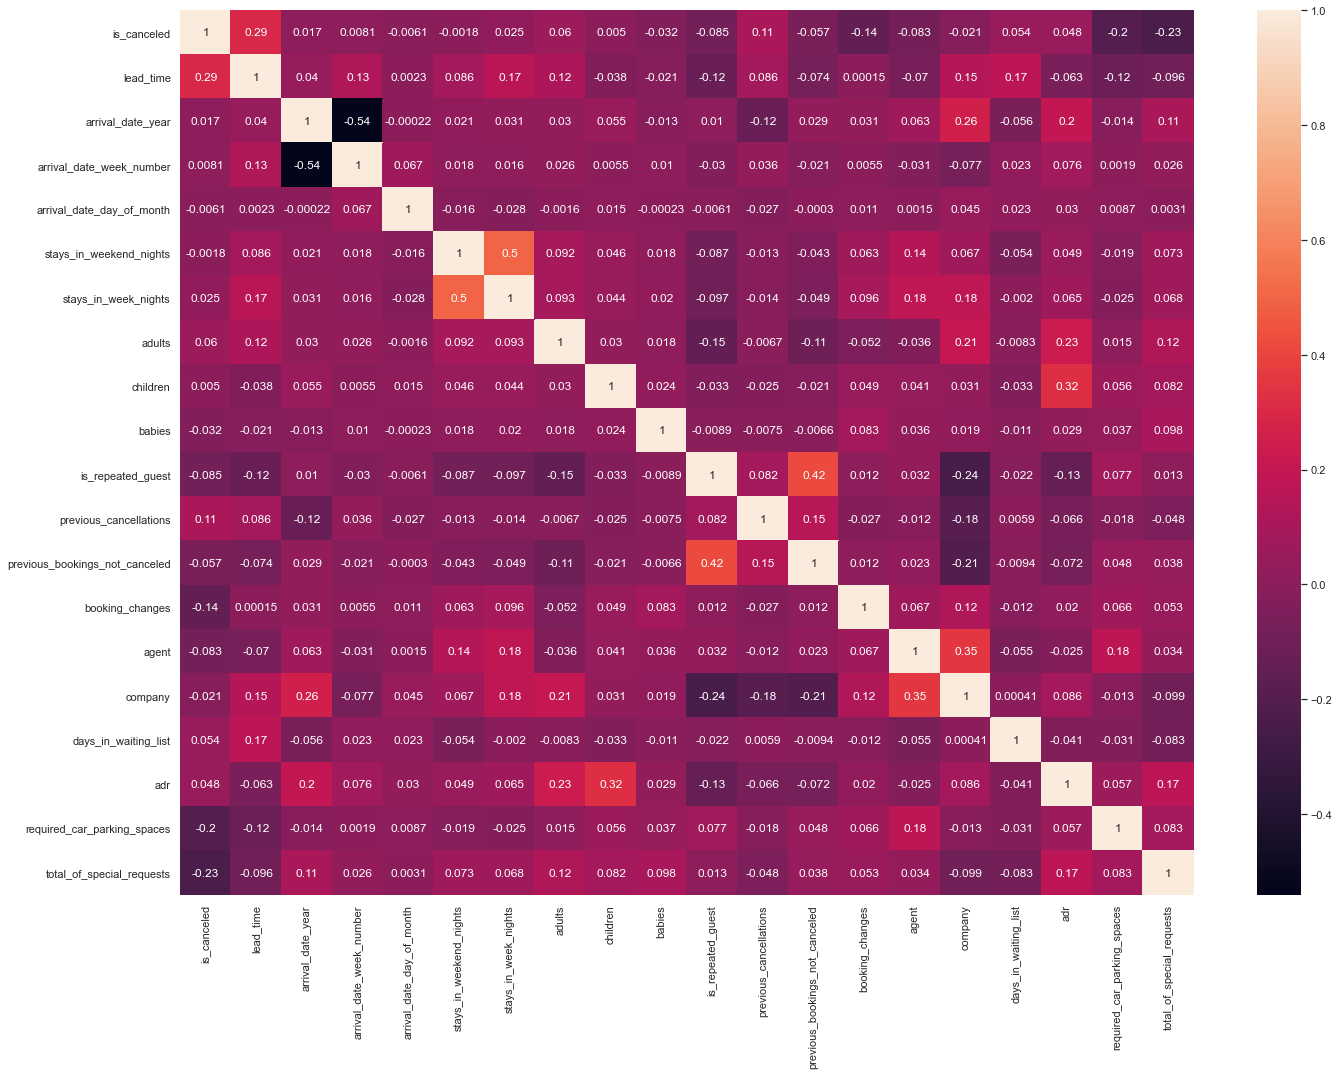

In [24]:
sns.set(rc={'figure.figsize':(22.7,16.27)})
ax = sns.heatmap(cor_matrix, annot=True)

In [25]:
cor_matrix > 0.5

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
lead_time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
arrival_date_year,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
arrival_date_week_number,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
arrival_date_day_of_month,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
stays_in_weekend_nights,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
stays_in_week_nights,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
adults,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
children,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
babies,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


Признаки сильно не коррелируют друг с другом. В большей степени являются независимыми.

In [27]:
data['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

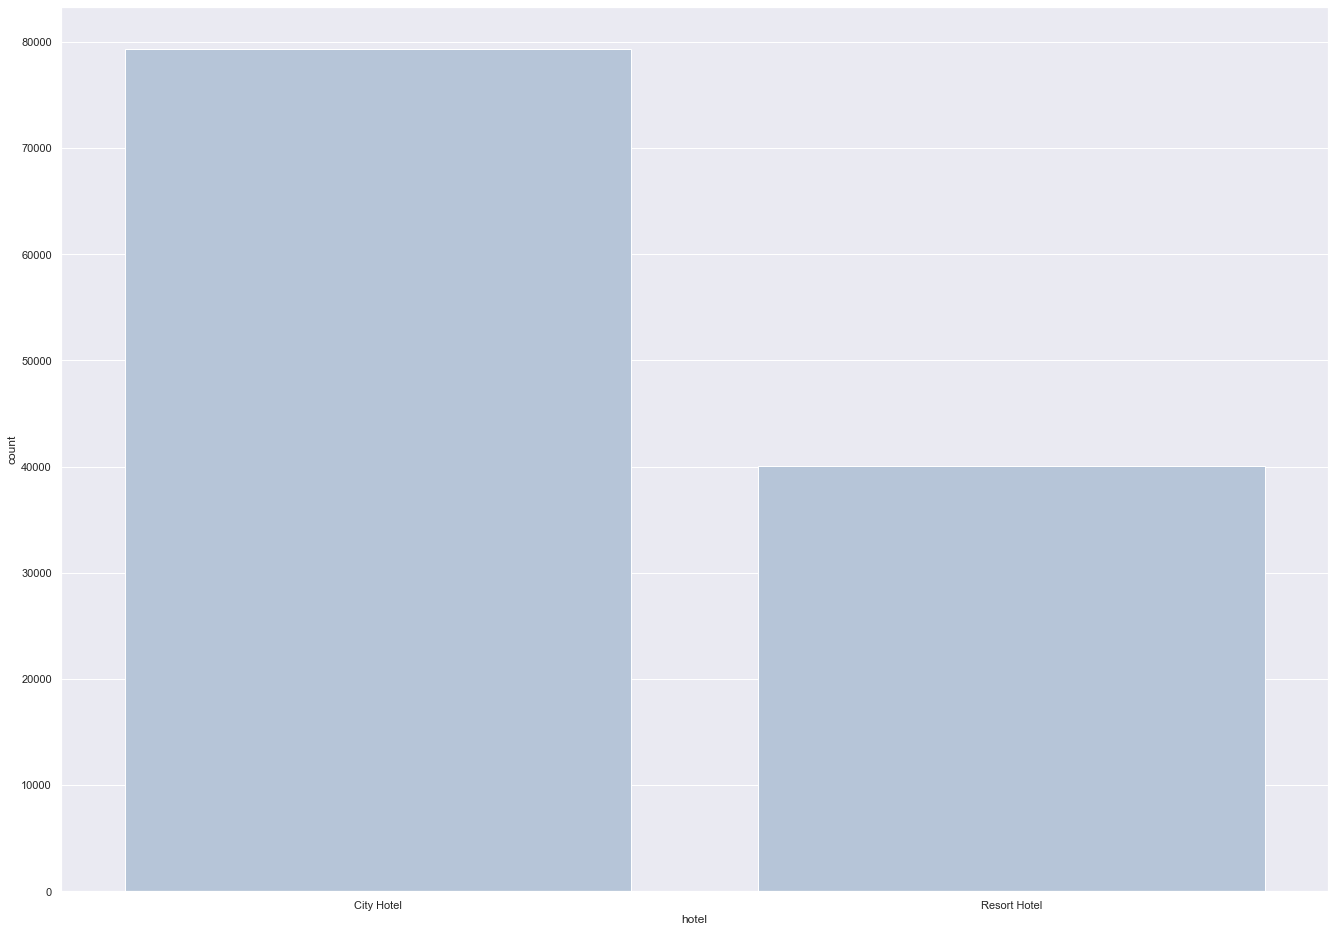

In [28]:
sns.countplot(x = 'hotel', data = data, color = ("#B0C4DE"))
pass

Спрос на City Hotel больше, чем на Resort Hotel.

In [29]:
data['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

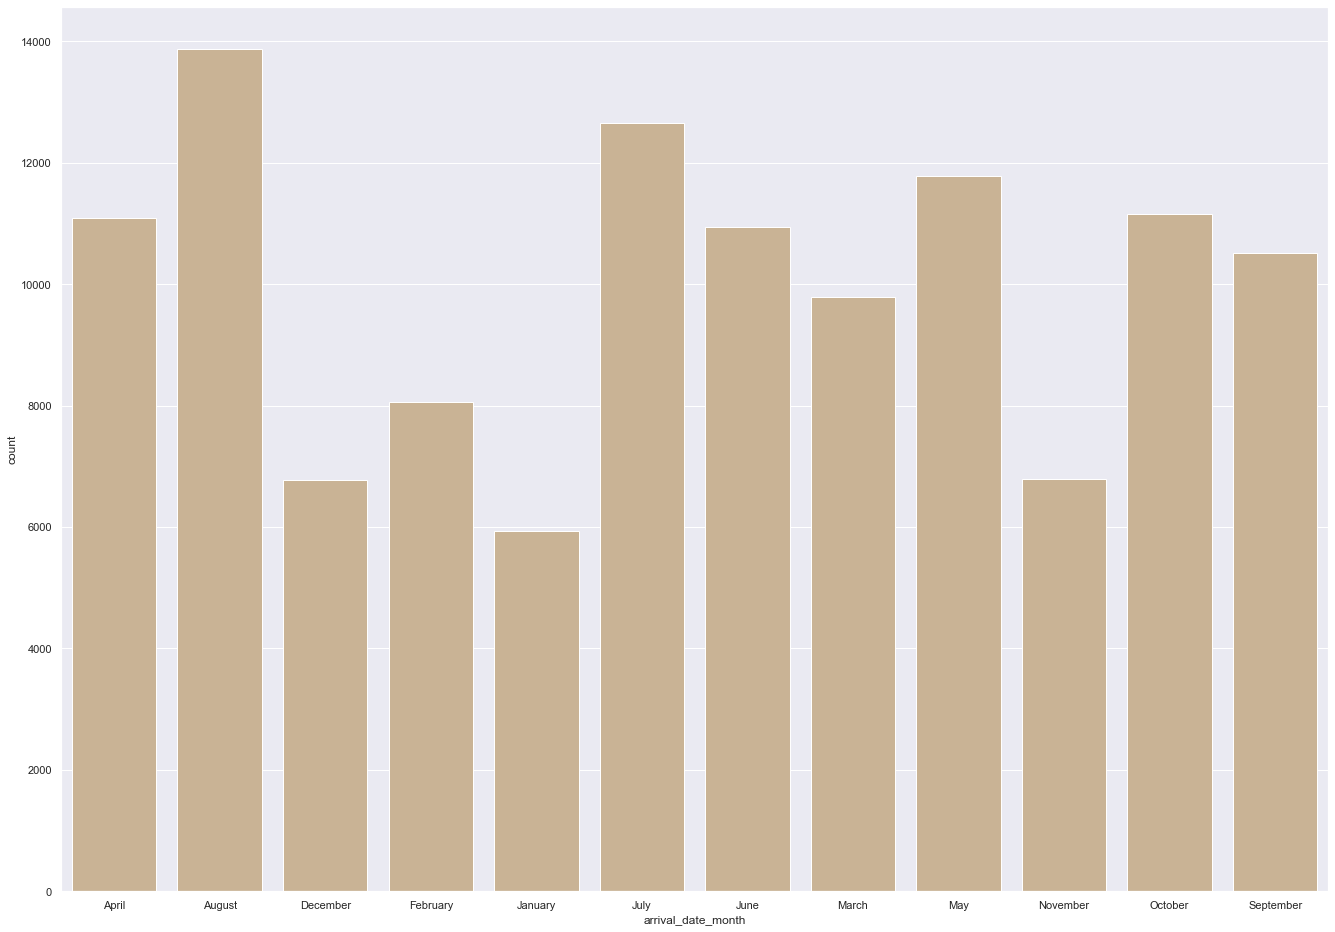

In [30]:
sns.countplot(x = 'arrival_date_month', data = data, color = ("#D2B48C"))
pass

Можем сделать вывод, что в июле и августе наибольшее бронирование.

In [31]:
data['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

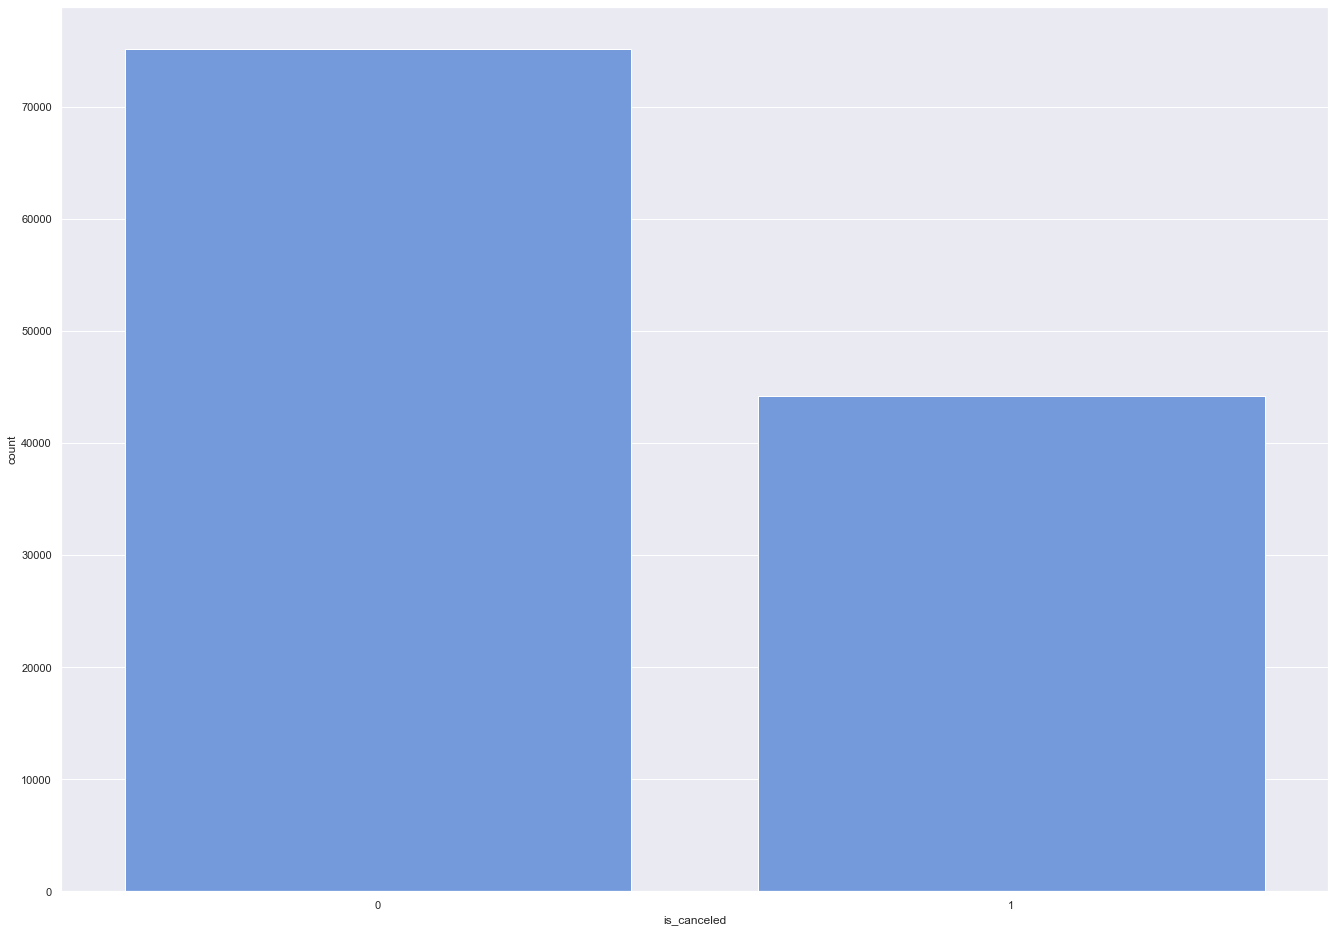

In [32]:
sns.countplot(x = 'is_canceled', order = data['is_canceled'].value_counts().index,  data = data, color = ("#6495ED"))
pass

Можно сделать вывод, что было отменено примерно 37% от всех бронирований.

## Обработка пропущенных значений.

In [33]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [34]:
data=data.drop(data.columns[[24]], axis='columns')
data.shape

(119390, 30)

In [35]:
data.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


Удалили столбец 'company', так как он состоял в основном из пропущенных значений.

Избавимся от других пропущенных значений. В столбце 'agent' заполним их медианами, а в столбцах, соответствующих категориальным признакам, заполним модами.

In [36]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)
data['country'].fillna(data['country'].mode().iloc[0], inplace=True)
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

Избавились от всех пропущенных значений. Были обработаны все пропуски.

## Обработка категориальных признаков.

In [38]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'category']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'category']
print('categorical_columns=', categorical_columns)
print('numerical_columns=', numerical_columns)

categorical_columns= ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']
numerical_columns= ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [39]:
data_describe = data.describe(include=['category'])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print('binary_columns=', binary_columns)
print('nonbinary_columns=', nonbinary_columns)

binary_columns= ['hotel']
nonbinary_columns= ['arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']


In [41]:
data['hotel'].unique()

[Resort Hotel, City Hotel]
Categories (2, object): [Resort Hotel, City Hotel]

К небинарными признакам применим метод векторизации.

Признак j, принимающий k значений, заменим на k признаков, принимащих значения 0 или 1, в зависимости от того, чему равно значение исходного признака j. Например, у нас вместо одного столбца с двумя отелями, будет два столбца: 'Resort Hotel', 'City Hotel', каждый из которых принимает значения либо 1 (если заселились в этот отель), либо 0 (если иначе).

In [42]:
data[nonbinary_columns]

,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
1,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
2,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out
3,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out
4,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
...,...,...,...,...,...,...,...,...,...,...
119385,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out
119386,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out
119387,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out
119388,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out


In [43]:
data_categorical = pd.get_dummies(data[nonbinary_columns])
print(data_categorical.columns)

Index(['arrival_date_month_April', 'arrival_date_month_August',
       'arrival_date_month_December', 'arrival_date_month_February',
       'arrival_date_month_January', 'arrival_date_month_July',
       'arrival_date_month_June', 'arrival_date_month_March',
       'arrival_date_month_May', 'arrival_date_month_November',
       ...
       'deposit_type_No Deposit', 'deposit_type_Non Refund',
       'deposit_type_Refundable', 'customer_type_Contract',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'reservation_status_Canceled',
       'reservation_status_Check-Out', 'reservation_status_No-Show'],
      dtype='object', length=239)


In [44]:
len(data_categorical.columns)

239

In [45]:
data_categorical

,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
119386,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
119387,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
119388,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


## Нормализация.

In [46]:
numerical_columns_exept_is_canceled = ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
data_numerical_exept_is_canceled = data[numerical_columns_exept_is_canceled]
data_numerical_exept_is_canceled.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,76.744392,2.321149,101.831122,0.062518,0.571363
std,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,105.904658,17.594721,50.535790,0.245291,0.792798
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,94.575000,0.000000,0.000000
75%,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


In [47]:
data_numerical_exept_is_canceled = (data_numerical_exept_is_canceled - data_numerical_exept_is_canceled.mean(axis = 0))/data_numerical_exept_is_canceled.std(axis = 0)
data_numerical_exept_is_canceled.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05
mean,-4.810214e-15,-1.368946e-13,7.414698e-16,1.723649e-16,5.805366e-14,2.683450e-15,2.437054e-15,1.854600e-15,-6.143698e-15,-4.172520e-14,5.787542e-14,-8.708821e-15,-1.231855e-15,6.941780e-14,6.828137e-14,6.270327e-14,1.519090e-15,-8.461662e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.733146e-01,-1.634761e+00,-1.923183e+00,-1.685290e+00,-9.288865e-01,-1.310234e+00,-3.204779e+00,-2.606575e-01,-8.157892e-02,-1.815596e-01,-1.031791e-01,-9.155438e-02,-3.389884e-01,-7.152130e-01,-1.319230e-01,-2.141277e+00,-2.548718e-01,-7.206911e-01
25%,-8.048748e-01,-2.212855e-01,-8.206585e-01,-8.880985e-01,-9.288865e-01,-7.862039e-01,2.478962e-01,-2.606575e-01,-8.157892e-02,-1.815596e-01,-1.031791e-01,-9.155438e-02,-3.389884e-01,-6.396734e-01,-1.319230e-01,-6.439223e-01,-2.548718e-01,-7.206911e-01
50%,-3.276287e-01,-2.212855e-01,6.136116e-02,2.297721e-02,7.250190e-02,-2.621733e-01,2.478962e-01,-2.606575e-01,-8.157892e-02,-1.815596e-01,-1.031791e-01,-9.155438e-02,-3.389884e-01,-5.924611e-01,-1.319230e-01,-1.435838e-01,-2.548718e-01,-7.206911e-01
75%,5.239281e-01,1.192190e+00,7.963776e-01,8.201684e-01,1.073890e+00,2.618573e-01,2.478962e-01,-2.606575e-01,-8.157892e-02,-1.815596e-01,-1.031791e-01,-9.155438e-02,-3.389884e-01,7.105977e-01,-1.319230e-01,4.782527e-01,-2.548718e-01,5.406636e-01
max,5.923360e+00,1.192190e+00,1.898902e+00,1.731244e+00,1.809749e+01,2.489129e+01,9.174379e+01,2.482997e+01,1.025497e+02,5.507786e+00,3.069024e+01,4.799061e+01,3.185451e+01,4.327058e+00,2.209065e+01,1.048399e+02,3.235943e+01,5.586082e+00


Провели нормализацию.

In [48]:
data = pd.concat((data['is_canceled'], data_numerical_exept_is_canceled, data_categorical), axis = 1)
print(data.shape)

(119390, 258)


In [50]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
count,119390.000000,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,...,119390.000000,119390.000000,119390.000000,119390.00000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,-4.810214e-15,-1.368946e-13,7.414698e-16,1.723649e-16,5.805366e-14,2.683450e-15,2.437054e-15,1.854600e-15,-6.143698e-15,...,0.876464,0.122179,0.001357,0.03414,0.004833,0.750591,0.210436,0.360307,0.629584,0.010110
std,0.482918,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.329053,0.327494,0.036811,0.18159,0.069351,0.432673,0.407620,0.480091,0.482918,0.100038
min,0.000000,-9.733146e-01,-1.634761e+00,-1.923183e+00,-1.685290e+00,-9.288865e-01,-1.310234e+00,-3.204779e+00,-2.606575e-01,-8.157892e-02,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-8.048748e-01,-2.212855e-01,-8.206585e-01,-8.880985e-01,-9.288865e-01,-7.862039e-01,2.478962e-01,-2.606575e-01,-8.157892e-02,...,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-3.276287e-01,-2.212855e-01,6.136116e-02,2.297721e-02,7.250190e-02,-2.621733e-01,2.478962e-01,-2.606575e-01,-8.157892e-02,...,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,5.239281e-01,1.192190e+00,7.963776e-01,8.201684e-01,1.073890e+00,2.618573e-01,2.478962e-01,-2.606575e-01,-8.157892e-02,...,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,5.923360e+00,1.192190e+00,1.898902e+00,1.731244e+00,1.809749e+01,2.489129e+01,9.174379e+01,2.482997e+01,1.025497e+02,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Объединили все в одну таблицу.

## Разбиение данных на обучающую и тестовую выборки.

In [52]:
x = data.drop('is_canceled', axis = 1) # выбрасываем столбец 'is_canceled'
y = data['is_canceled']
feature_names = x.columns
type(feature_names)
x = x.to_numpy()
y = y.to_numpy()
print(x.shape)
print(y.shape)
N, d = x.shape

(119390, 257)
(119390,)


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)

89542 29848


Произвели разделение на обучающую и тестовую выборки (тестовая выборка - 25%, обучающая выборка - 75%).

## Классификатор ближайших соседей.

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.02616590726346824

In [58]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.024189225408737604

## Вычисление ошибки.

In [57]:
knn = KNeighborsClassifier(n_neighbors = 10).fit(X_train, y_train)
err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))
print(err_train, err_test)

0.020772374974872127 0.02616590726346824


In [63]:
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))
print(err_train, err_test)

0.0153782582475263 0.024189225408737604


## Итоги:

Метод k ближайших соседей хорошо работает с нашими данными. По результатам вычислений видно, что при 5 ближайщих соседях метод дает более лучший результат, чем при 10. Ошибка на тестовой выборке = 0.024189225408737604, а ошибка на обучающей выборке = 0.0153782582475263.

Была выполнена визуализация данных и вычисление основных характеристик (среднее, разброс, корреляционную матрицу и т.д.), обработка пропущенных значений, обработка категориальных признаков, проведена нормализация. Также был запущен классификатор ближайших соседей.

# Обучение нейронной сети.

Нам необходимо предсказать, будет ли отменено бронирование или нет. 
Пусть y - столбец, отвечающий за отмену бронирования, а X - остальные столбцы.

In [60]:
X = data.drop('is_canceled', axis = 1)
y = data['is_canceled']
feature_names = X.columns
feature_names

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest',
       ...
       'deposit_type_No Deposit', 'deposit_type_Non Refund',
       'deposit_type_Refundable', 'customer_type_Contract',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'reservation_status_Canceled',
       'reservation_status_Check-Out', 'reservation_status_No-Show'],
      dtype='object', length=257)

In [11]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)

89542 29848


Рассмотрим однослойную нейронную сеть.

In [12]:
from sklearn.neural_network import MLPClassifier

In [64]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print("train error: " + str(np.mean(y_train != y_train_pred)), "test error: " + str(np.mean(y_test != y_test_pred)))
print(str(mlp_model.score(X_train, y_train)), str(mlp_model.score(X_test, y_test)))
print("test error: " + str(1 - mlp_model.score(X_test, y_test)))
print("train error: " + str(1 - mlp_model.score(X_train, y_train)))

train error: 0.0 test error: 0.0
1.0 1.0
test error: 0.0
train error: 0.0


Один скрытый слой (число нейронов - 100). На тренировочной и тестовой выборках получается одинаковый результат. 

In [65]:
mlp_model = MLPClassifier(hidden_layer_sizes = (50,), solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print("train error:", np.mean(y_train != y_train_pred), "test error:", np.mean(y_test != y_test_pred))
print("train error:", mlp_model.score(X_train, y_train), "test error:", mlp_model.score(X_test, y_test))
print("test error:", 1 - mlp_model.score(X_test, y_test))
print("train error:", 1 - mlp_model.score(X_train, y_train))

train error: 0.0 test error: 0.0
train error: 1.0 test error: 1.0
test error: 0.0
train error: 0.0


Один скрытый слой (число нейронов - 50). На тренировочной и тестовой выборках получается одинаковый результат. 

In [66]:
mlp_model = MLPClassifier(hidden_layer_sizes = (500,), solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print("train error:", np.mean(y_train != y_train_pred), "test error:", np.mean(y_test != y_test_pred))
print("train error:", mlp_model.score(X_train, y_train), "test error:", mlp_model.score(X_test, y_test))
print("test error:", 1 - mlp_model.score(X_test, y_test))
print("train error:", 1 - mlp_model.score(X_train, y_train))

train error: 0.0 test error: 0.0
train error: 1.0 test error: 1.0
test error: 0.0
train error: 0.0


Один скрытый слой (число нейронов - 500). На тренировочной и тестовой выборках получается одинаковый результат.

Можно сделать вывод, что при увеличении и уменьшении числа нейронов в однослойной сети качество обучения не меняется. 

Рассмотрим двухслойную нейронную сеть.

In [78]:
mlp_model = MLPClassifier(hidden_layer_sizes = (800,2), solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print("train error:", np.mean(y_train != y_train_pred), "test error:", np.mean(y_test != y_test_pred))

train error: 0.36961425923030533 test error: 0.37282229965156793


Здесь мы видим, что получается небольшое переобучение (т.к. ошибка на тестовой выборке стала больше, чем на тренировочной).

### Подбор гиперпараметров.

Подберем оптимальное значение параметра регуляризации alpha

In [79]:
alpha_arr = np.logspace(-5, 3, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (800, 2), solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)
    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

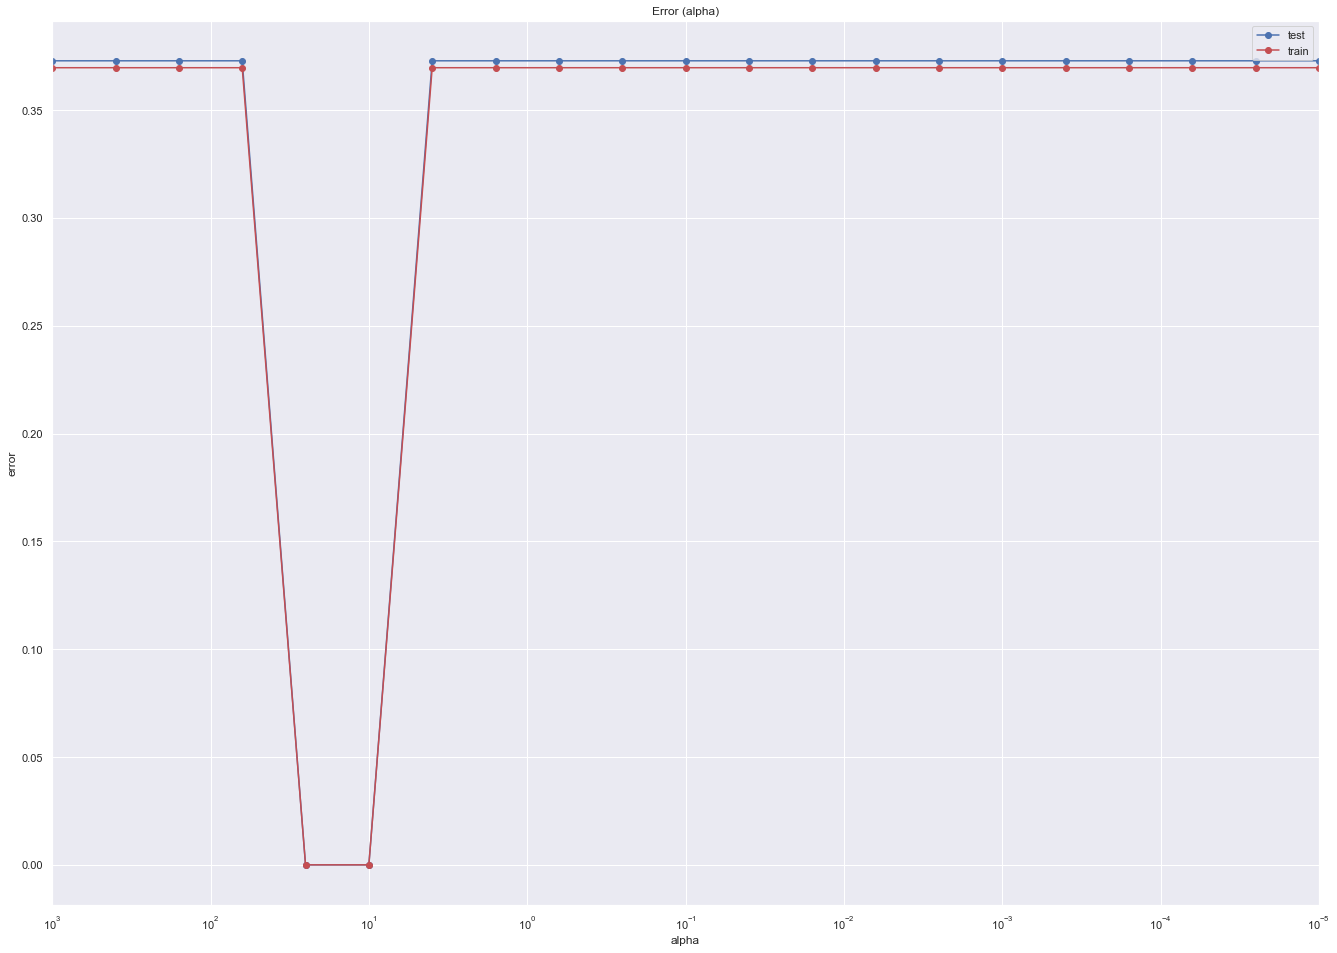

In [80]:
plt.semilogx(alpha_arr, test_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, train_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error (alpha)')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [81]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Минимальное значение ошибки(тренировочной/тестовой): ', min_train_err, min_test_err)
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print('Оптимальное значение параметра alpha: ', alpha_opt)

Минимальное значение ошибки(тренировочной/тестовой):  0.0 0.0
Оптимальное значение параметра alpha:  10.0


In [82]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (800,2), solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0
0.0


При оптимальном альфа переобучения не возникает.

Вернемся к однослойной модели. Подберем оптимальное значение количества нейронов для случая с переобучением (800 нейронов).

In [83]:
neurons_arr = (1, 2, 5, 10, 20, 50, 100, 200, 500, 700, 800, 900, 1000, 1100, 1200, 1500)
test_err = []
train_err = []
for neuron in neurons_arr:
    mlp_model = MLPClassifier(alpha = 10.0, hidden_layer_sizes = (neuron, ), solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)
    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

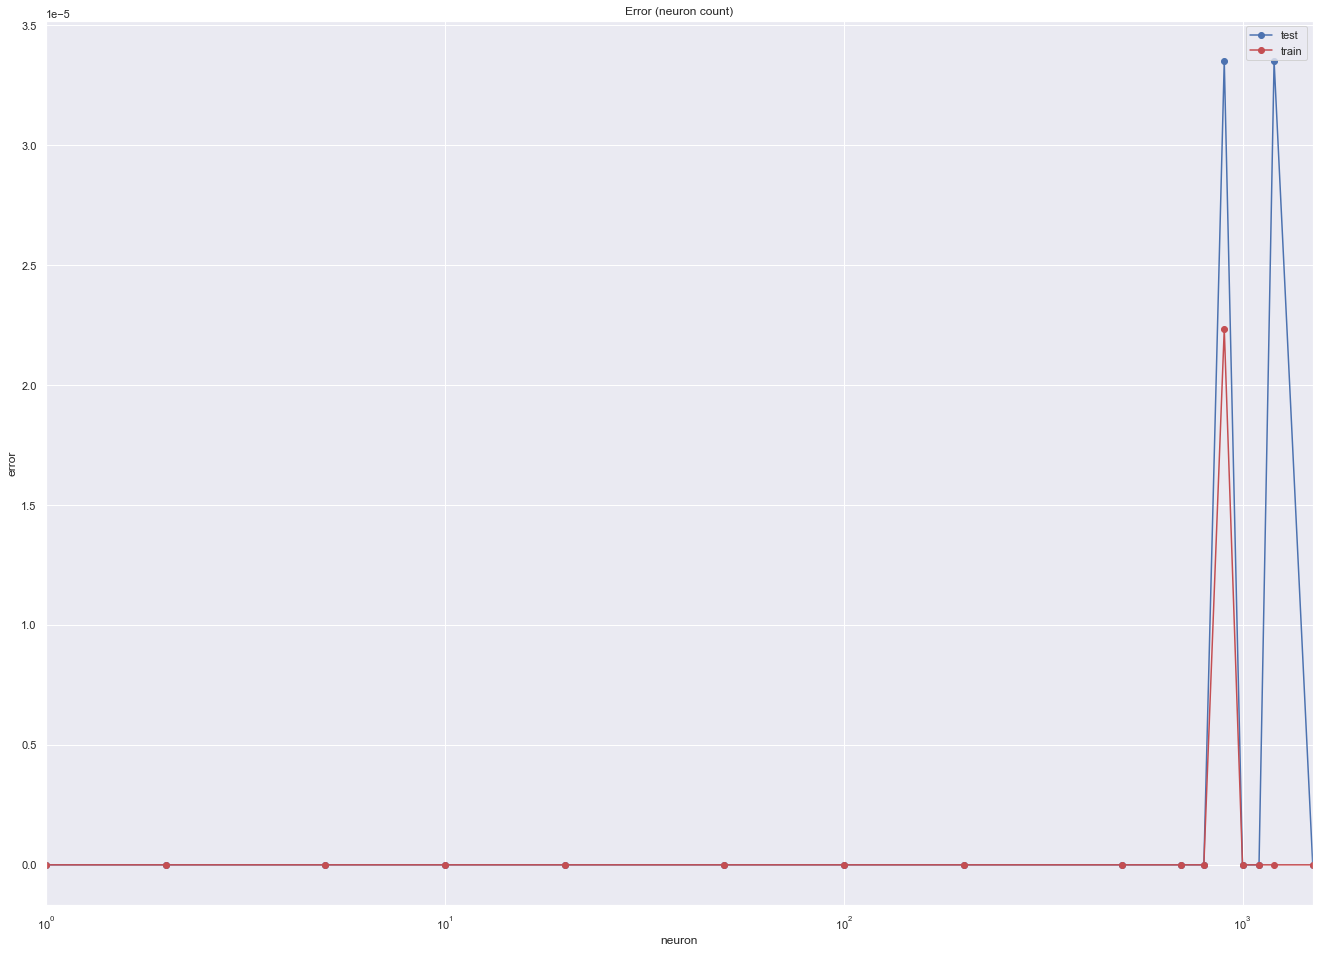

In [84]:
plt.semilogx(neurons_arr, test_err, 'b-o', label = 'test')
plt.semilogx(neurons_arr, train_err, 'r-o', label = 'train')
plt.xlim([np.min(neurons_arr), np.max(neurons_arr)])
plt.title('Error (neuron count)')
plt.xlabel('neuron')
plt.ylabel('error')
plt.legend()
pass

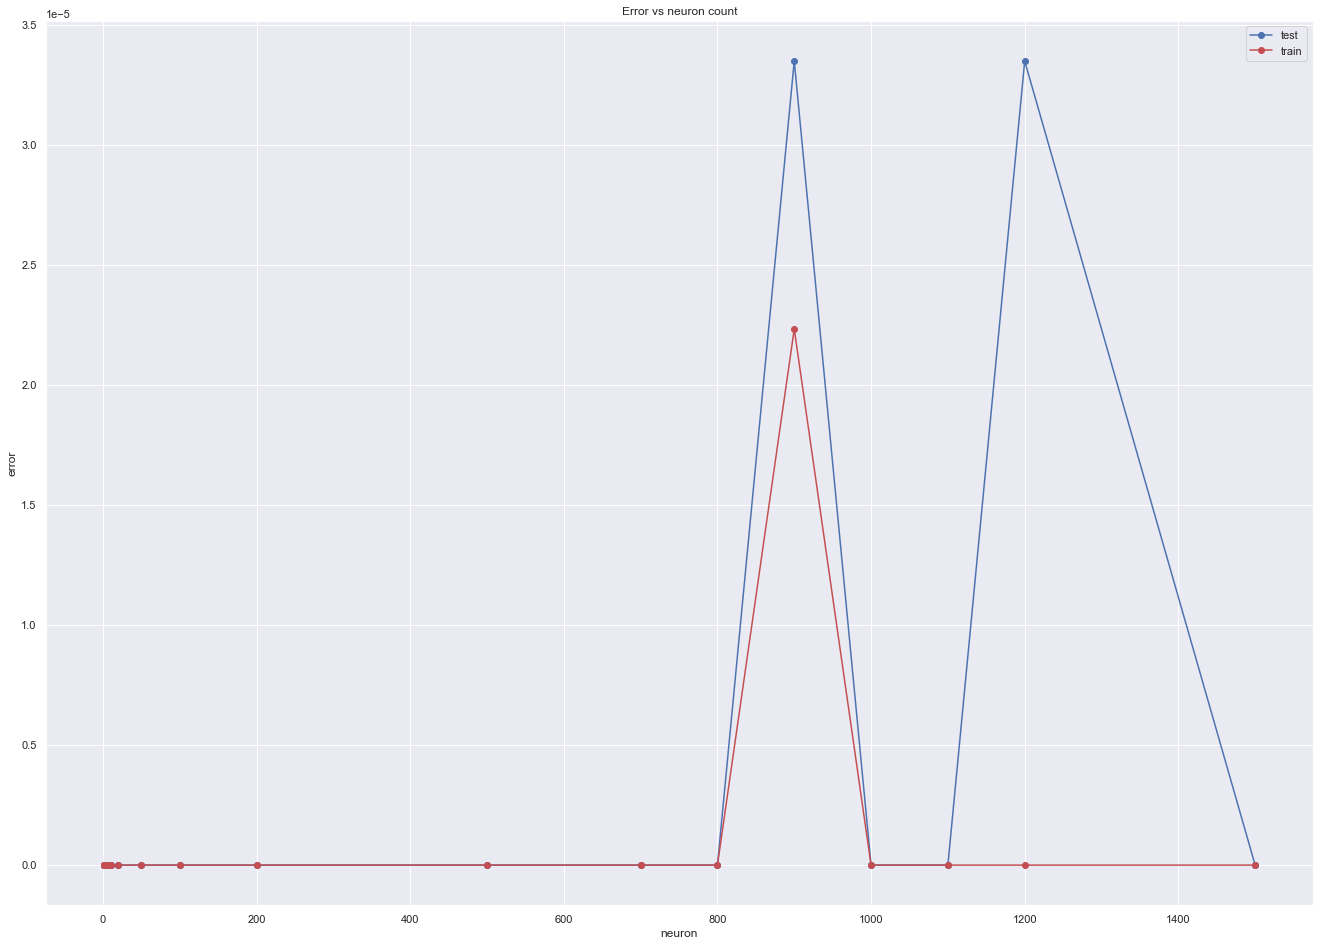

In [85]:
plt.plot(neurons_arr, test_err, 'b-o', label = 'test')
plt.plot(neurons_arr, train_err, 'r-o', label = 'train')
plt.title('Error (neuron count)')
plt.xlabel('neuron')
plt.ylabel('error')
plt.legend()
pass

In [87]:
print(test_err)
print(min_test_err)
index=-1
for item in range(0, len(test_err)-1):
    if min_test_err == test_err[item]:
        index=item
        break
neurons_opt = neurons_arr[index]
print(neurons_opt)
test_err = []
train_err = []
mlp_model = MLPClassifier(alpha = 10.0, hidden_layer_sizes = (neurons_opt, ), solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

[]
0.0
1500
0.0
0.0


Далее рассмотрим двухслойную модель. Подберем оптимальное значение количества нейронов для случая с переобучением (800 нейронов).

In [ ]:
neurons_arr = (1, 2, 5, 10, 20, 50, 100, 200, 500, 700, 800, 900, 1000)
test_err = []
train_err = []
for neuron in neurons_arr:
    mlp_model = MLPClassifier(alpha = 10.0, hidden_layer_sizes = (neuron, 2), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

In [ ]:
plt.semilogx(neurons_arr, test_err, 'b-o', label = 'test')
plt.semilogx(neurons_arr, train_err, 'r-o', label = 'train')
plt.xlim([np.min(neurons_arr), np.max(neurons_arr)])
plt.title('Error (neuron count)')
plt.xlabel('neuron')
plt.ylabel('error')
plt.legend()
pass

In [ ]:
plt.plot(neurons_arr, test_err, 'b-o', label = 'test')
plt.plot(neurons_arr, train_err, 'r-o', label = 'train')
plt.title('Error(neuron count)')
plt.xlabel('neuron')
plt.ylabel('error')
plt.legend()
pass

In [ ]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)
index=-1
for item in range(0, len(test_err)-1):
    if min_test_err == test_err[item]:
        index=item
        break
neurons_opt = neurons_arr[index]
print(neurons_opt)

In [ ]:
test_err = []
train_err = []
mlp_model = MLPClassifier(alpha = 10.0, hidden_layer_sizes = (neurons_opt, 2), solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

## Итоги:

В ходе данной работы было проведено обучение модели нейронной сети с двумя скрытыми слоями. Опираясь на полученные результаты можно сделать вывод, что ошибка в однослойной модели почти не зависит от числа нейронов. На втором скрытом слое у нас появляется  переобучение небольшое, которое можно убрать с помощью подбора параметра alpha.